<a href="https://colab.research.google.com/github/AMIT110409/Deep_learning_Algo_implementation/blob/main/perceptron_trick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from sklearn.datasets import make_classification
import numpy as np
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

In [43]:
X

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

In [3]:
import matplotlib .pyplot as plt

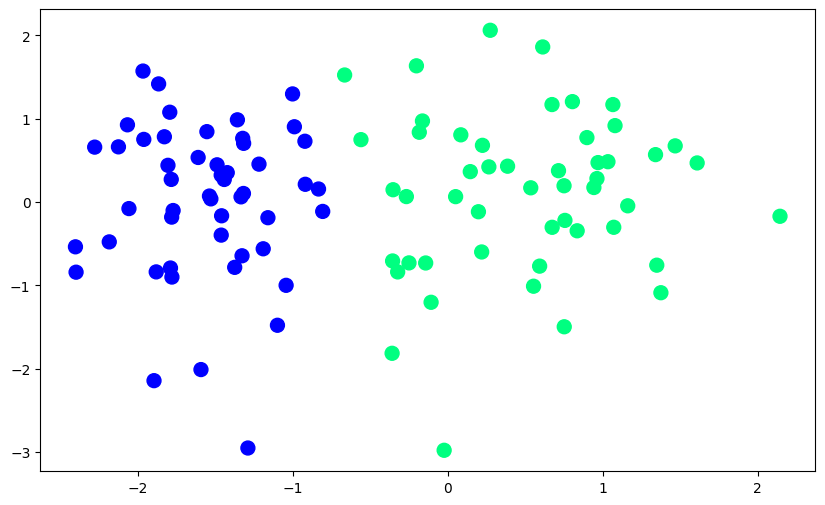

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [11]:
def perceptron(X,y):
  X = np.insert(X,0,1,axis=1) ## adding one (1,2.3,4.5)
  weights = np.ones(X.shape[1])  #3 shape is equal to x ,
  lr = 0.1

  for i in range(1000):
    j = np.random.randint(0,100) ## select random integer .
    y_hat = step(np.dot(X[j],weights)) ##prediction
    weights = weights + lr*(y[j]-y_hat)*X[j]

  return weights[0],weights[1:]


In [13]:
np.ones(3)  ## here w_not, w1,w2)

array([1., 1., 1.])

In [6]:
np.dot(np.insert(X[41],0,1),[1,1,1])

np.float64(0.2946000908036749)

In [9]:
step(-0.294)

0

In [8]:
def step(z):
  return 1 if z>0 else 0

In [14]:
intercept_,coef_ = perceptron(X,y)

In [15]:
print(coef_)
print(intercept_)

[1.35019364 0.05129279]
1.0


In [16]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [17]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

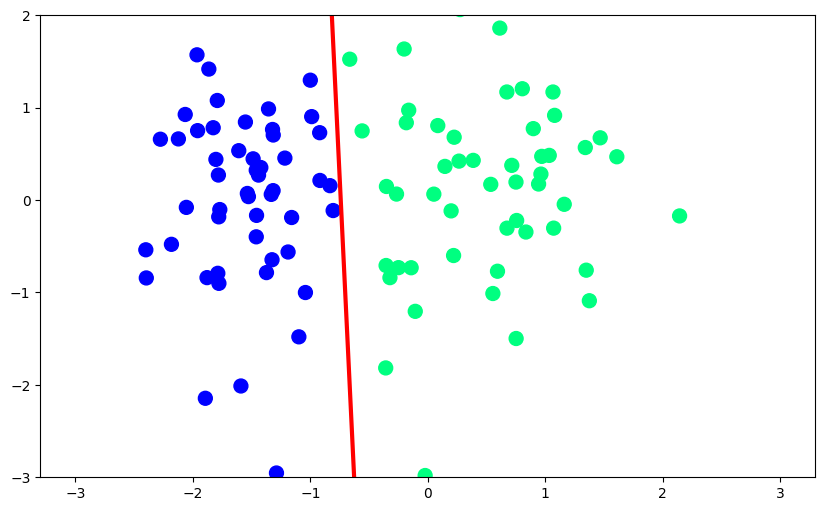

In [20]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [21]:
def perceptron(X,y):

    m = []
    b = []

    X =  np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(200):
      j = np.random.randint(0,100)
      y_hat = step(np.dot(X[j],weights))
      weights = weights + lr*(y[j]-y_hat)*X[j]

      m.append(-(weights[1]/weights[2]))
      b.append(-(weights[0]/weights[2]))

    return m,b

In [22]:
m,b = perceptron(X,y)

In [23]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [28]:
fig,ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3,3,0.1)
y_i = x_i*m[0] + b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i,x_i*m[0] + b[0],'r-',linewidth=2)
plt.ylim(-3,3)
def update(i):
  label = 'epoch {0}'.format(i+1)
  line.set_ydata(x_i*m[i] + b[i])
  ax.set_xlabel(label)
  #return line ,ax

anim = FuncAnimation(fig,update,repeat=True,frames=200,interval=100)
anim.save('perceptron_animation.gif', writer='pillow')

<IPython.core.display.Javascript object>

In [44]:
def perceptron1(X,y):

    w1=w2=b=1
    lr = 0.1

    for j in range(1000):
        for i in range(X.shape[0]):
            # check condition
            z = w1*X[i][0] + w2*X[i][1] + b  # here z is f(x_i)

            if z*y[i] < 0:
                w1 = w1 + lr*y[i]*X[i][0]
                w2 = w2 + lr*y[i]*X[i][1]
                b = b +lr*y[i]

    return w1,w2,b

In [45]:
w1,w2,b = perceptron1(X,y)

In [46]:
w1

np.float64(0.9243919310080415)

In [47]:
w2

np.float64(0.15134060762638524)

In [48]:
m = -(w1/w2)
c = -(b/w2)

In [49]:
print(m,c)

-6.108023124170937 -9.250656660875727


(-3.0, 2.0)

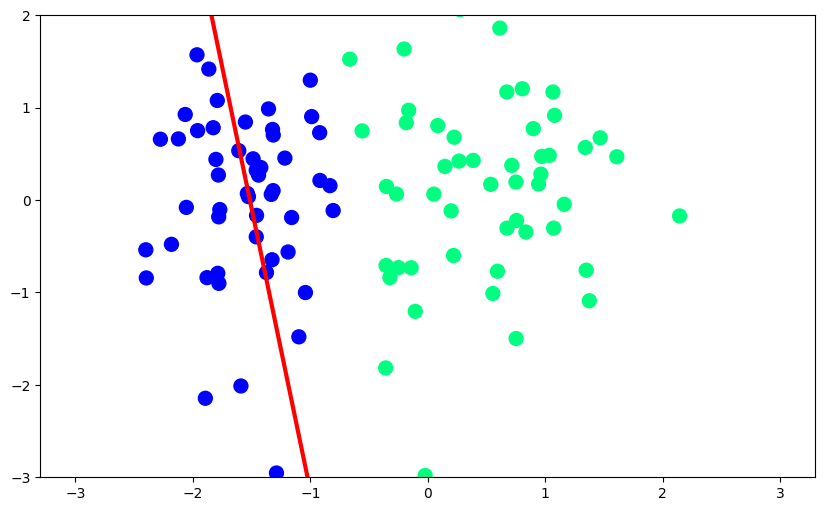

In [52]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [41]:
%matplotlib inline